This notebook assumes you have already followed the steps in `README.md`. If not, do that first!

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:

tf.enable_eager_execution()

In [5]:
#tf.disable_v2_behavior()

In [28]:
dirlist = lambda di: [os.path.join(di, file) for file in os.listdir(di) if 'part-' in file]
training_files = dirlist('/home/debjani/Desktop/droughtwatch_1/data/train/')


def parse_visual(data):
    count = 0
    dataset = tf.data.TFRecordDataset(data)
    # pattern for one part file
    # dataset = tf.data.TFRecordDataset('part-r-00099')
    iterator = dataset.make_one_shot_iterator()

    features = {
        'B2': tf.FixedLenFeature([], tf.string),
        'B3': tf.FixedLenFeature([], tf.string),
        'B4': tf.FixedLenFeature([], tf.string),
        'label': tf.FixedLenFeature([], tf.int64),
    }

    parsed_examples = [tf.parse_single_example(data, features) for data in iterator]
    count+=1
    #print(countnt)
    return parsed_examples

parsed_examples = parse_visual(training_files[395])
#print(parsed_examples[0])

In [8]:
def get_img_from_example(parsed_example, intensify=True):
    rgbArray = np.zeros((65,65,3), 'uint8')
    for i, band in enumerate(['B4', 'B3', 'B2']):
        band_data = np.frombuffer(parsed_example[band].numpy(), dtype=np.uint8)
        band_data = band_data.reshape(65, 65)
        if intensify:
            band_data = band_data/np.max(band_data)*255
        else:
            band_data = band_data*255
        rgbArray[..., i] = band_data
        
    label = tf.cast(parsed_example['label'], tf.int32).numpy()
        
    return rgbArray, label

/home/debjani/anaconda3/envs/env3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


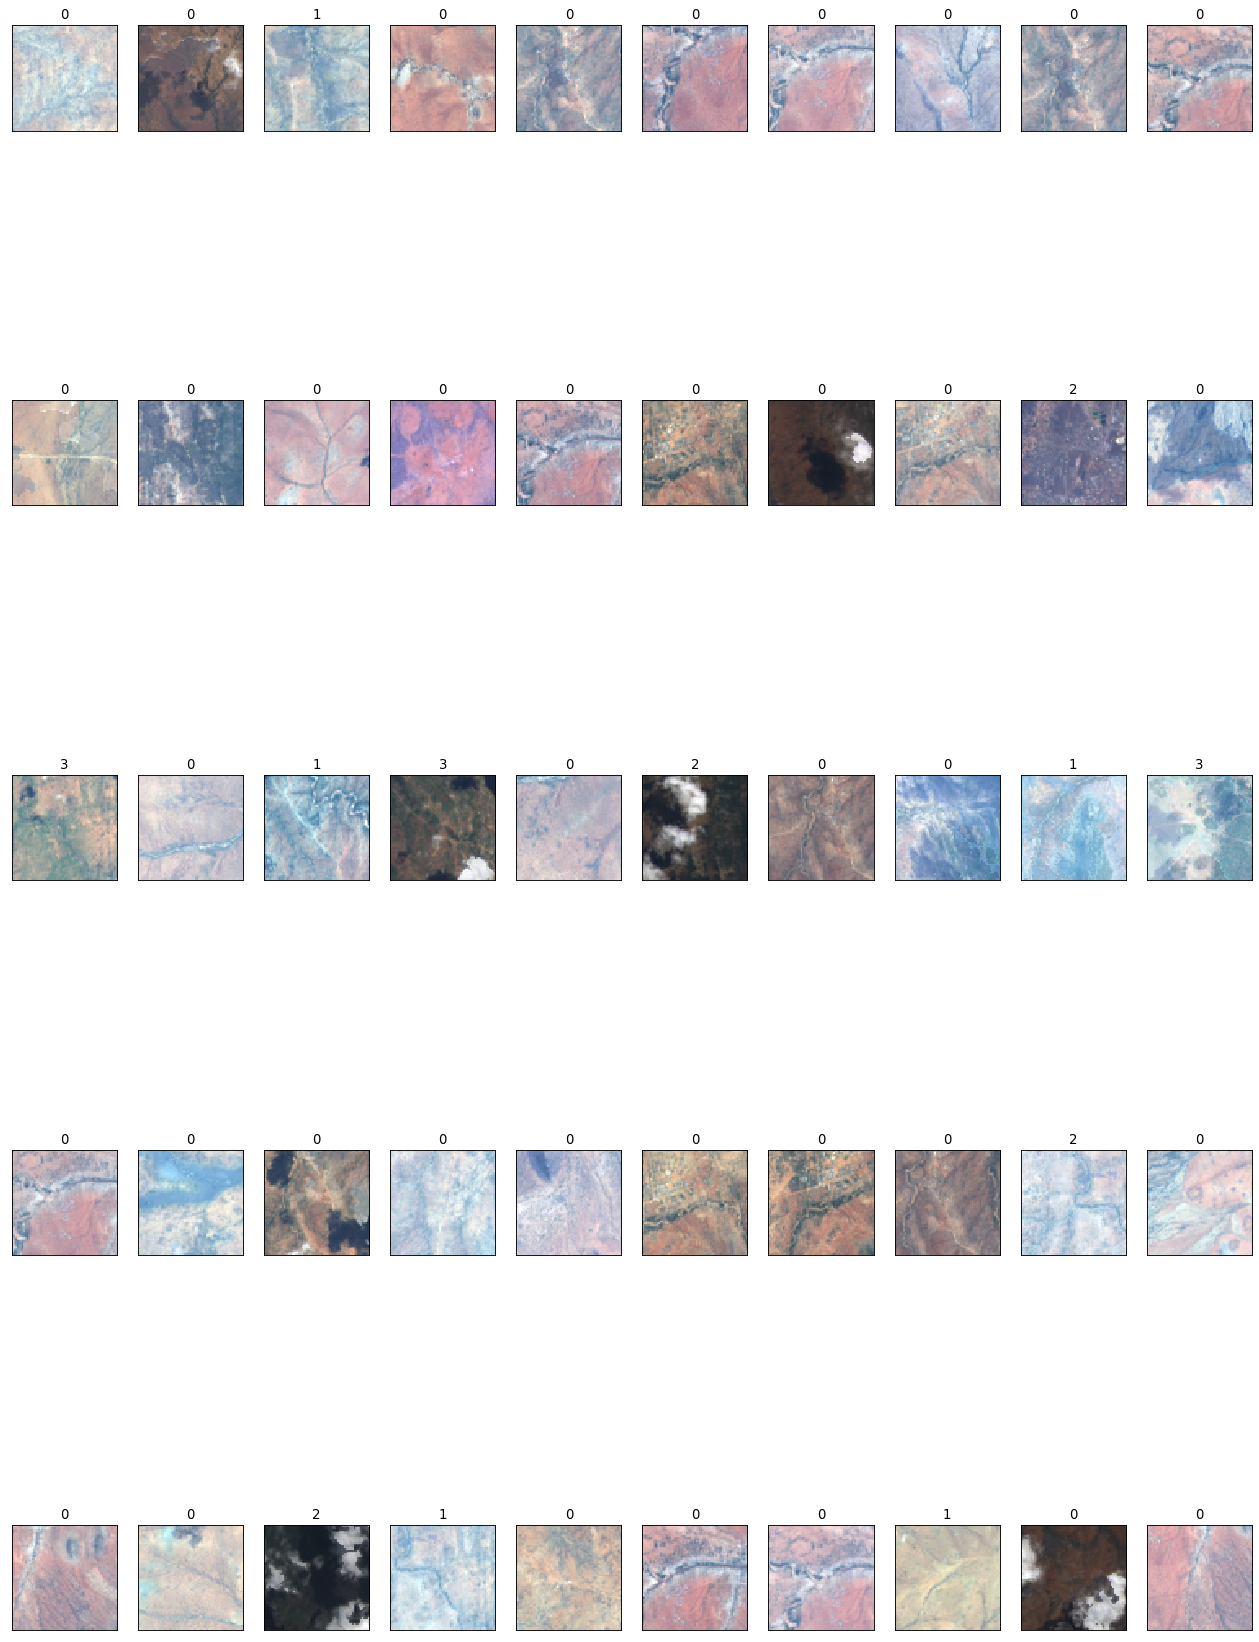

In [19]:
fig=plt.figure(figsize=(20, 30), dpi= 80, facecolor='w', edgecolor='k')
for i in range(1,51):
    plt.subplot(5, 10, i)
    img, label = img, label = get_img_from_example(parsed_examples[i])
    plt.imshow(img).axes.get_xaxis().set_visible(False)
    plt.imshow(img).axes.get_yaxis().set_visible(False)
    plt.title(str(label))

fig.show()